### Double-well potential

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', **{
    'family': 'sans-serif',
    'sans-serif': ['DejaVu Sans'],
    'size': 10
})
# Set the font used for MathJax - more on this later
rc('mathtext', **{'default': 'regular'})
plt.rc('font', family='serif')

In [2]:
def double_well(x, y, a=1, b=6, c=1, d=1):
    return 0.25 * a * x ** 4 - 0.5 * b * x ** 2 + c * x + 0.5 * d * y ** 2 

#def E(x, y, a=1, b=6, c=1, d=1): # default parameter values given in pg. 4 of the SI 
#    return a*x**4 - b*x**2 + c*x + d*y**2/2

In [3]:
def plot_FES(a=1, b=6, c=1, d=1):
    x = np.linspace(-6,6,100)
    y = np.linspace(-10,10,100)
    X, Y = np.meshgrid(x, y)
    E = double_well(X, Y, a, b, c, d)

    plt.figure()
    plt.contourf(X, Y, E, 10)
    plt.xlabel('$ x_{1} $')
    plt.ylabel('$ x_{2} $')
    plt.title('Contour plot of the double-well potential')
    plt.colorbar()

According to the supplemntary materials of the paper, the equation of the double-well potential is $E(x, y) = \frac{1}{4}ax^{4}-\frac{1}{2}bx^{2}+cx+\frac{1}{2}dy^{2}$
Therefore, we have:
$$\frac{\partial E}{\partial x} = ax^{3}-bx+c=0, \;\frac{\partial E}{\partial y}=dy=0$$
By default, $a=1$, $b=6$, $c=1$, and $d=1$, so the three places with a 0 derivative along with their potential are:
$(-2.5289, 0, -11.4898)$, $(0.16745, 0, 0.0835)$, and $(2.3615, 0, -6.5937)$. Accordingly, the energy difference between the wells is $4.8961$.


In [4]:
double_well(2.3615, 0) - double_well(-2.5289, 0)

4.896126997299831

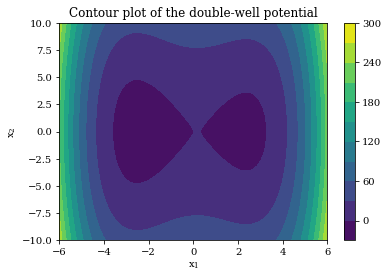

In [5]:
plot_FES()

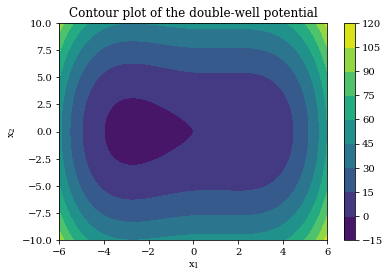

In [7]:
# other options: a=0.25, b=1.5
# same position of minima and the same energy difference between them, but a much smaller barrier
# This is for estimating the average time needed for a return trip between both states
plot_FES(a=0.25, b=1.5, c=1, d=1)

### Mueller Brown potential

In [8]:
import potentials

In [9]:
aj = np.array([-1, -1, -6.5, 0.7])
bj = np.array([0, 0, 11, 0.6])
cj = np.array([-10, -10, 6.5, 0.7])
Aj = np.array([-200, -100, -170, 15])
xj = np.array([1, 0, -0.5, -1])
yj = np.array([0, 0.5, 1.5, 1])

mueller = potentials.MuellerPotential(aj, bj, cj, Aj, xj, yj)

In [16]:
def plot_contour(potential, x_range, y_range, grid = [100, 100]):
    x = np.linspace(x_range[0],x_range[1], grid[0])
    y = np.linspace(y_range[0],y_range[1], grid[1])
    X, Y = np.meshgrid(x, y)
    E = potential(X, Y)
    print(E)
    plt.figure()
    plt.contourf(X, Y, E, np.linspace(-1.5,1.5, 1000))
    plt.colorbar()
    

[[-2.87876797e+10 -2.34594762e+10 -1.90162893e+10 ... -6.58980413e+00
  -5.99115833e+00 -5.34070015e+00]
 [-1.74187949e+10 -1.42586842e+10 -1.16101173e+10 ... -6.63806830e+00
  -6.03566901e+00 -5.38141067e+00]
 [-1.05957996e+10 -8.71253978e+09 -7.12609532e+09 ... -6.52936472e+00
  -5.92223286e+00 -5.26331448e+00]
 ...
 [ 1.80289860e+00  1.56331568e+00  1.26358318e+00 ...  1.29736285e+02
   1.38806582e+02  1.48585778e+02]
 [ 1.86936497e+00  1.62203707e+00  1.31077368e+00 ...  1.36495510e+02
   1.46090518e+02  1.56433870e+02]
 [ 1.93385542e+00  1.67709479e+00  1.35207463e+00 ...  1.43660407e+02
   1.53822506e+02  1.64773680e+02]]


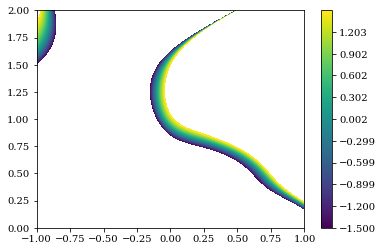

In [17]:
plot_contour(mueller, [-1, 1], [0, 2])